#Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/SM5/DL/Lec/respiratory-sound-database.zip', 'r') as zip_ref:
    if not os.path.exists('/content/Dataset'):
        os.makedirs('/content/Dataset')

    zip_ref.extractall('/content/Dataset')

# Code

In [ ]:
import os

import wave
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import Audio

import librosa
import librosa.display

In [ ]:
audio_data = '/content/Dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'

## 1. EDA & Preprocessing

In [ ]:
import pandas as pd

diagnosis_df = pd.read_csv('/content/Dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv', names=['patient_id', 'disease'])
diagnosis_df.head(5)

,patient_id,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [ ]:
diagnosis_df['disease'].value_counts()

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: disease, dtype: int64

In [ ]:
diagnosis_df.disease.value_counts(normalize=True) * 100

COPD              50.793651
Healthy           20.634921
URTI              11.111111
Bronchiectasis     5.555556
Pneumonia          4.761905
Bronchiolitis      4.761905
LRTI               1.587302
Asthma             0.793651
Name: disease, dtype: float64

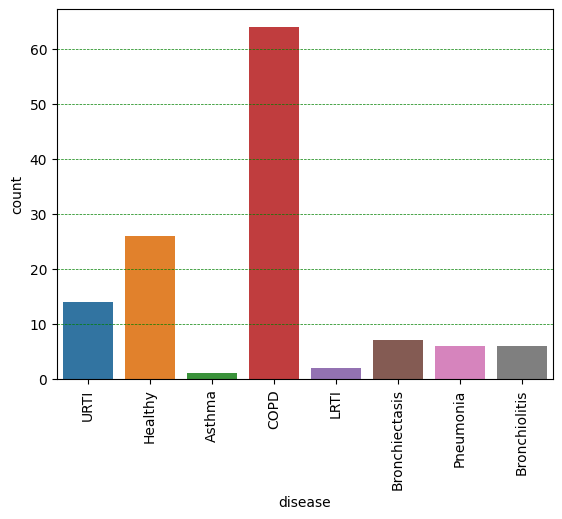

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'disease' is a categorical column in your DataFrame
sns.countplot(data=diagnosis_df, x='disease')
plt.grid(axis='y', color='green', linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.show()

Pisahin file txt sendiri

In [ ]:
path=audio_data
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]

In [ ]:
files[:10]

['135_2b3_Pr_mc_LittC2SE',
 '154_1b3_Al_mc_AKGC417L',
 '112_1p1_Pl_sc_Litt3200',
 '107_2b5_Pr_mc_AKGC417L',
 '147_2b2_Pl_mc_AKGC417L',
 '170_1b3_Pl_mc_AKGC417L',
 '192_2b1_Ar_mc_LittC2SE',
 '170_1b2_Al_mc_AKGC417L',
 '151_2p3_Al_mc_AKGC417L',
 '197_1b1_Al_sc_Meditron']

Preprocess audio

In [ ]:
def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def stretch(data, rate):
    data = librosa.effects.time_stretch(y=data, rate=rate)
    return data

def pitch_shift (data , rate):
    data = librosa.effects.pitch_shift(data, sr=220250, n_steps=rate)
    return data

In [ ]:
def show_audio(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y , 0.0008)
    y_shift = shift(y,3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)

    plt.figure(figsize=(20, 8))

    plt.subplot(3,2,1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('orginal')

    plt.subplot(3,2,2)
    librosa.display.waveshow(y_noise, sr=sr)
    plt.title('noise')

    plt.subplot(3,2,3)
    librosa.display.waveshow(y_shift, sr=sr)
    plt.title('shift')

    plt.subplot(3,2,4)
    librosa.display.waveshow(y_stretch_1, sr=sr)
    plt.title('stretch 1')

    plt.subplot(3,2,5)
    librosa.display.waveshow(y_stretch_2, sr=sr)
    plt.title('stretch 2')

    plt.subplot(3,2,6)
    librosa.display.waveshow(y_pitch_shift, sr=sr)
    plt.title('pitch shift')

    plt.tight_layout()

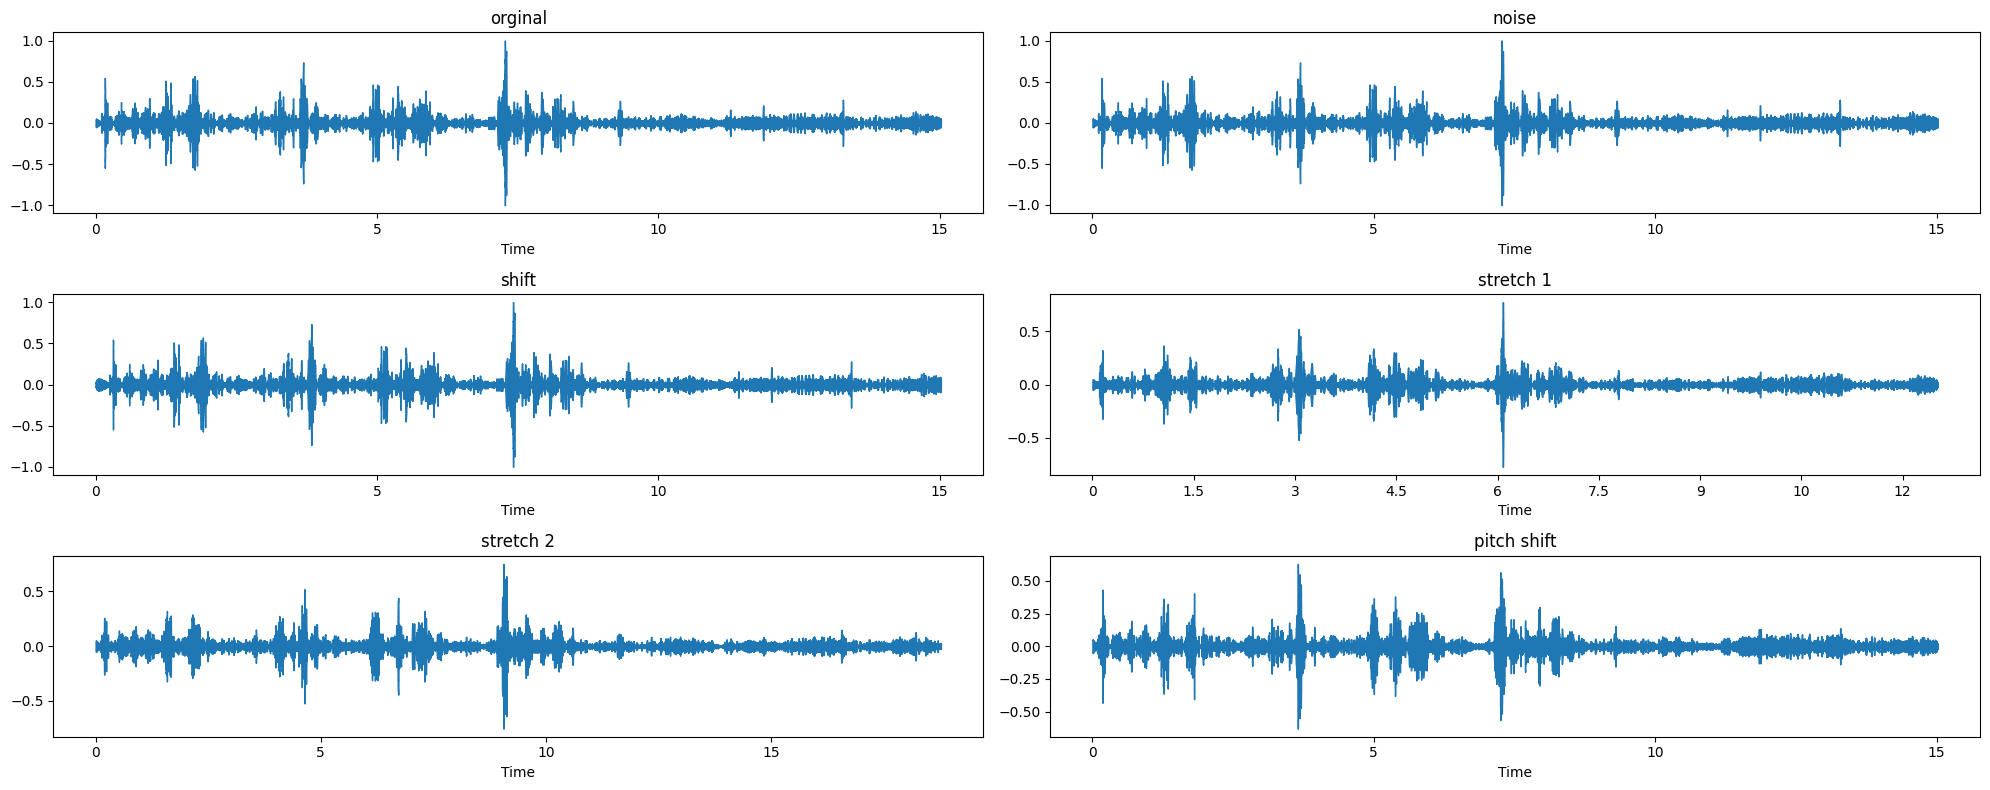

In [ ]:
show_audio('/content/Dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/104_1b1_Lr_sc_Litt3200.wav')

In [ ]:
def show_audio_features(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y , 0.0008)
    y_shift = shift(y,3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)

    y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    y_noise = librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=50)
    y_shift = librosa.feature.mfcc(y=y_shift, sr=sr, n_mfcc=50)
    y_stretch_1 = librosa.feature.mfcc(y=y_stretch_1, sr=sr, n_mfcc=50)
    y_stretch_2 = librosa.feature.mfcc(y=y_stretch_2, sr=sr, n_mfcc=50)
    y_pitch_shift = librosa.feature.mfcc(y=y_pitch_shift, sr=sr, n_mfcc=50)

    plt.figure(figsize=(20, 8))

    plt.subplot(3,2,1)
    librosa.display.specshow(librosa.power_to_db(y,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('orginal')

    plt.subplot(3,2,2)
    librosa.display.specshow(librosa.power_to_db(y_noise,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('noise')

    plt.subplot(3,2,3)
    librosa.display.specshow(librosa.power_to_db(y_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('shift')

    plt.subplot(3,2,4)
    librosa.display.specshow(librosa.power_to_db(y_stretch_1,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 1')

    plt.subplot(3,2,5)
    librosa.display.specshow(librosa.power_to_db(y_stretch_2,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 2')

    plt.subplot(3,2,6)
    librosa.display.specshow(librosa.power_to_db(y_pitch_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('pitch shift')



    plt.tight_layout()

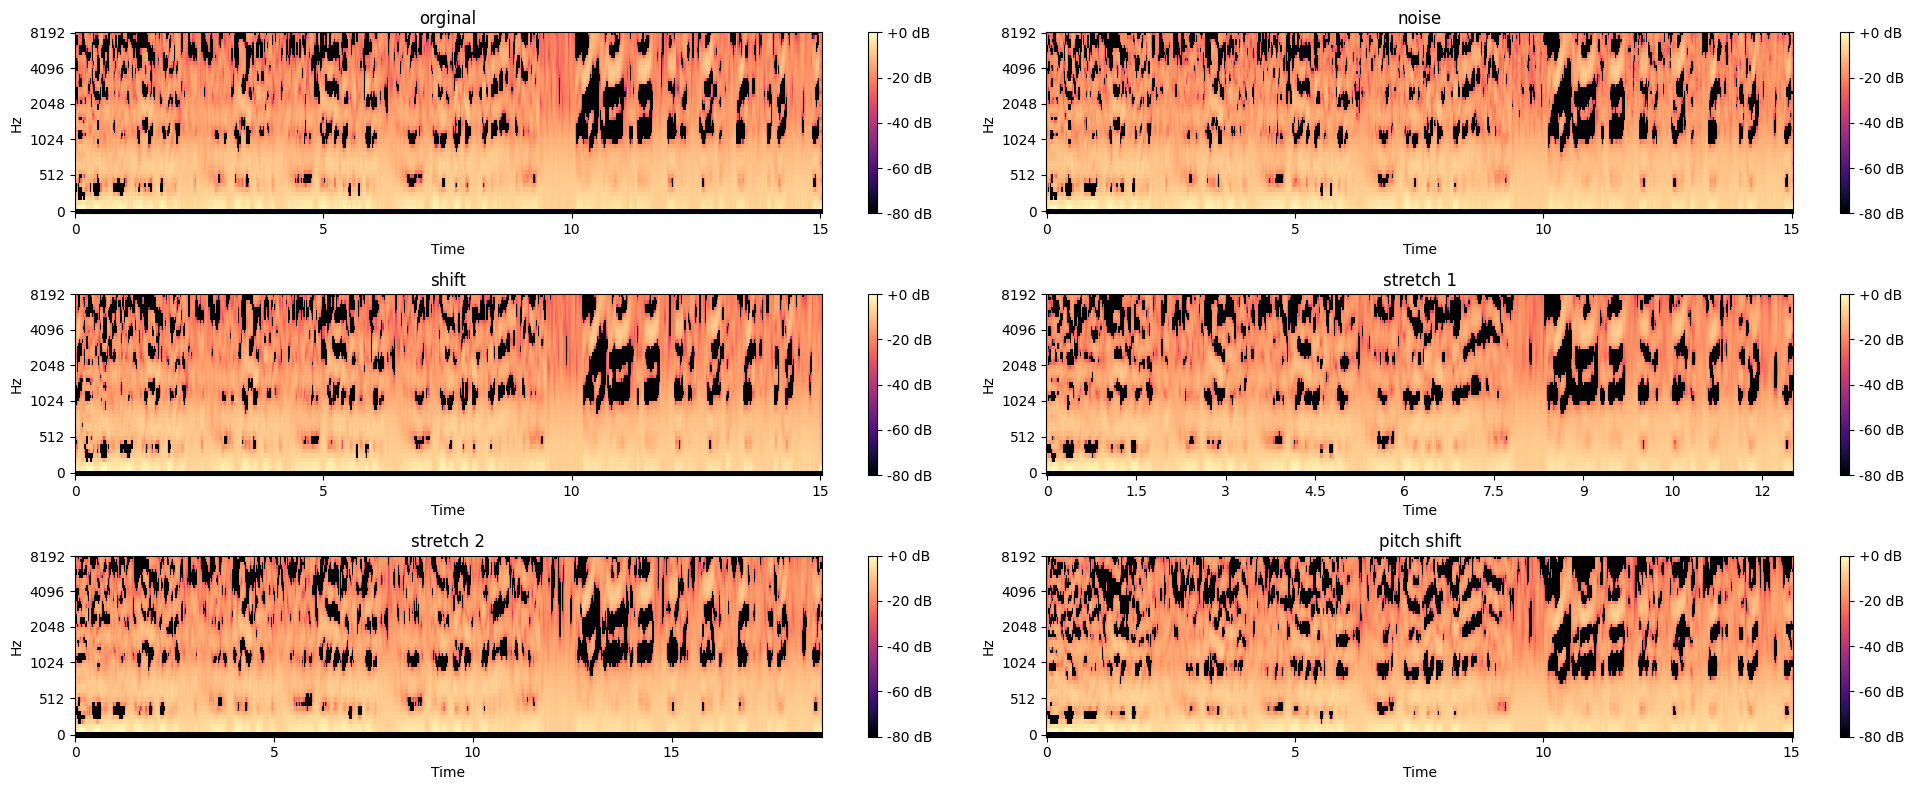

In [ ]:
show_audio_features('/content/Dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/104_1b1_Lr_sc_Litt3200.wav')

In [ ]:
!pip install pydub

In [ ]:
# import os
# import numpy as np
# import librosa
# import librosa.display
# from pydub import AudioSegment
# from pydub.playback import play

# def mfccs_feature_extraction(dir_):
#     X = []
#     y = []

#     data = diagnosis_df
#     features = 52

#     for soundDir in os.listdir(dir_):
#         if soundDir.endswith('.wav') and soundDir[:3] not in ['103', '108', '115']:
#             p = list(data[data['patient_id'] == int(soundDir[:3])]['disease'])[0]
#             data_x, sampling_rate = librosa.load(os.path.join(dir_, soundDir))
#             mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
#             X.append(mfccs)
#             y.append(p)

#             # Apply data augmentation
#             data_noise = add_noise(data_x, 0.001)
#             mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T, axis=0)
#             X.append(mfccs_noise)
#             y.append(p)

#             data_shift = shift(data_x, 1600)
#             mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
#             X.append(mfccs_shift)
#             y.append(p)

#             data_stretch = stretch(data_x, 1.2)
#             mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T, axis=0)
#             X.append(mfccs_stretch)
#             y.append(p)

#             data_stretch_2 = stretch(data_x, 0.8)
#             mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T, axis=0)
#             X.append(mfccs_stretch_2)
#             y.append(p)

#             data_pitch_shift = pitch_shift(data_x, 3)
#             mfccs_pitch_shift = np.mean(librosa.feature.mfcc(y=data_pitch_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
#             X.append(mfccs_pitch_shift)
#             y.append(p)

#     X_data = np.array(X)
#     y_data = np.array(y)

#     return X_data, y_data

# x_mfccs, y = mfccs_feature_extraction(audio_data)

In [ ]:
# import os
# import numpy as np

# # Define the folder path where you want to save the arrays
# save_folder = '/content/drive/MyDrive/SM5/DL/Lec'

# # Make sure the folder exists, or create it if it doesn't
# os.makedirs(save_folder, exist_ok=True)

# # Save the 'x_mfccs' array
# np.save(os.path.join(save_folder, 'x_mfccs.npy'), x_mfccs)

# # Save the 'y' array
# np.save(os.path.join(save_folder, 'y.npy'), y)

# print("Arrays saved successfully to", save_folder)


In [ ]:
import numpy as np

# Define the folder path where the arrays are saved
load_folder = '/content/drive/MyDrive/SM5/DL/Lec'

# Load the 'x_mfccs' array
x_mfccs = np.load(os.path.join(load_folder, 'x_mfccs.npy'))

# Load the 'y' array
y = np.load(os.path.join(load_folder, 'y.npy'))

# Now, x_mfccs_loaded and y_loaded contain the loaded arrays


In [ ]:
def augmented_lables_count(lables):
    unique, counts = np.unique(lables, return_counts=True)
    data_count = dict(zip(unique, counts))

    data = data_count

    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(courses, values, color =['orange','green','blue','red','yellow','black'],
            width = 0.4)

    plt.xlabel("Diseases")
    plt.ylabel("Count")
    plt.title("Count of each disease")
    plt.show()

    print(data_count)

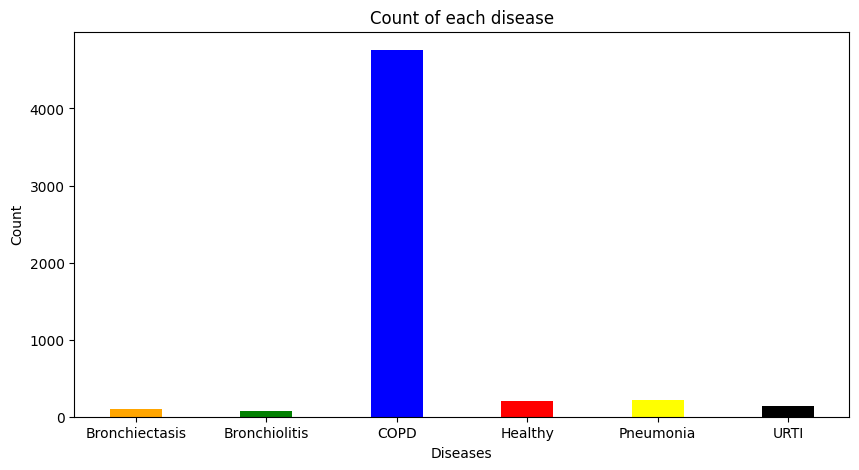

{'Bronchiectasis': 96, 'Bronchiolitis': 78, 'COPD': 4758, 'Healthy': 210, 'Pneumonia': 222, 'URTI': 138}


In [ ]:
augmented_lables_count(y)

Bagi rata

In [ ]:
import pandas as pd
import numpy as np

# Assuming x_mfccs and y have the same length
data = {'x_mfccs': [x.flatten() for x in x_mfccs], 'y': y}
df_temp = pd.DataFrame(data)

# Now, df contains both x_mfccs and y as columns
df_temp

,x_mfccs,y
0,"[-428.50701904296875, 99.85450744628906, 74.72...",COPD
1,"[-401.21278957547054, 88.84948492869009, 67.96...",COPD
2,"[-426.77740478515625, 99.32308959960938, 74.27...",COPD
3,"[-477.3011779785156, 111.19287872314453, 79.35...",COPD
4,"[-464.9798583984375, 102.23213195800781, 75.41...",COPD
...,...,...
5497,"[-358.6030050652364, 98.92444721912933, 58.785...",COPD
5498,"[-367.29443359375, 102.74150085449219, 63.8088...",COPD
5499,"[-414.514404296875, 108.56175231933594, 61.316...",COPD
5500,"[-387.0508728027344, 85.86864471435547, 62.253...",COPD


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
copd_df = df_temp[df_temp['y'] == 'COPD'][:np.mean([96, 78, 210, 222, 138]).astype(int)]  # Keep only the first 148 'COPD' samples
other_df = df_temp[df_temp['y'] != 'COPD']  # Keep the rows where 'y' is not 'COPD'

# Concatenate the filtered DataFrames
df_temp = pd.concat([copd_df, other_df])
df_temp

,x_mfccs,y
0,"[-428.50701904296875, 99.85450744628906, 74.72...",COPD
1,"[-401.21278957547054, 88.84948492869009, 67.96...",COPD
2,"[-426.77740478515625, 99.32308959960938, 74.27...",COPD
3,"[-477.3011779785156, 111.19287872314453, 79.35...",COPD
4,"[-464.9798583984375, 102.23213195800781, 75.41...",COPD
...,...,...
5467,"[-423.61848713052035, 62.193960136060625, 51.7...",URTI
5468,"[-500.7579650878906, 90.9355239868164, 65.3026...",URTI
5469,"[-529.2684326171875, 89.2093505859375, 64.9547...",URTI
5470,"[-531.984619140625, 88.9449462890625, 64.45646...",URTI


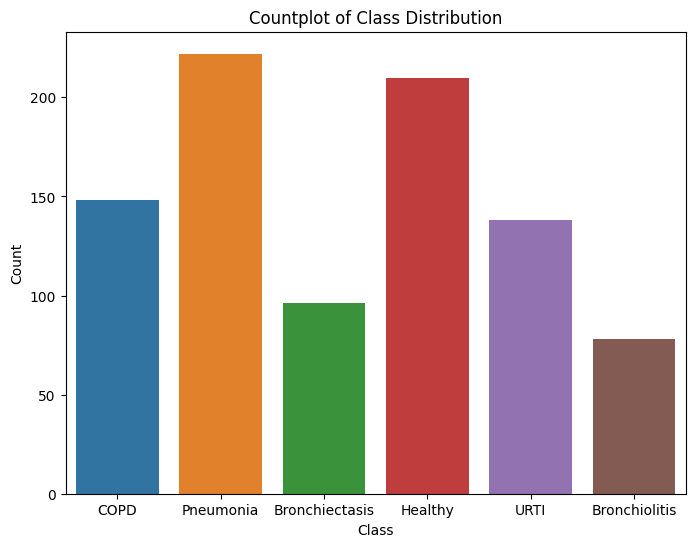

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_temp is your DataFrame
# Create a countplot of the 'y' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_temp, x='y')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Countplot of Class Distribution')

# Show the plot
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df'
df_encoded = df_temp.copy()  # Create a copy of the original DataFrame

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'y' column
df_encoded['y'] = label_encoder.fit_transform(df_encoded['y'])

# Now, the 'y' column contains label-encoded values
df_encoded

,x_mfccs,y
0,"[-428.50701904296875, 99.85450744628906, 74.72...",2
1,"[-401.21278957547054, 88.84948492869009, 67.96...",2
2,"[-426.77740478515625, 99.32308959960938, 74.27...",2
3,"[-477.3011779785156, 111.19287872314453, 79.35...",2
4,"[-464.9798583984375, 102.23213195800781, 75.41...",2
...,...,...
5467,"[-423.61848713052035, 62.193960136060625, 51.7...",5
5468,"[-500.7579650878906, 90.9355239868164, 65.3026...",5
5469,"[-529.2684326171875, 89.2093505859375, 64.9547...",5
5470,"[-531.984619140625, 88.9449462890625, 64.45646...",5


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Save the label encoding mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Now, the 'y' column contains label-encoded values, and label_mapping contains the mapping
print(label_mapping)

{'Bronchiectasis': 0, 'Bronchiolitis': 1, 'COPD': 2, 'Healthy': 3, 'Pneumonia': 4, 'URTI': 5}


In [ ]:
x_mfccs = df_encoded['x_mfccs']
y = df_encoded['y']

In [ ]:
import pandas as pd

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(y, prefix='class')
one_hot_encoded

,class_0,class_1,class_2,class_3,class_4,class_5
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
5467,0,0,0,0,0,1
5468,0,0,0,0,0,1
5469,0,0,0,0,0,1
5470,0,0,0,0,0,1


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame one_hot_encoded with one-hot encoded columns
# (e.g., 'class_0', 'class_1', 'class_2', etc.)
# Convert it to a NumPy array
y = one_hot_encoded.values
y

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [ ]:
mfccs_features = np.array(x_mfccs)
lables = np.array(y)

mfccs_features.shape , lables.shape

((892,), (892, 6))

In [ ]:
from sklearn.model_selection import train_test_split

mfcc_train, mfcc_val, lables_train, lables_val  = train_test_split(mfccs_features, lables, test_size=0.175, random_state=10)
mfcc_train, mfcc_test, lables_train, lables_test = train_test_split(mfcc_train, lables_train, test_size=0.075, random_state=10)

print (mfcc_train.shape, mfcc_val.shape, mfcc_test.shape)
print (lables_train.shape, lables_val.shape, lables_test.shape)

(679,) (157,) (56,)
(679, 6) (157, 6) (56, 6)


##Model

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.grid()


  # Plot accuracy
  plt.figure()
  plt.grid()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
import numpy as np

def expand_back(target):
  # Add an extra dimension to each array
  list_of_arrays_with_extra_dimension = [np.expand_dims(arr, axis=0) for arr in target]
  list_of_arrays_with_extra_dimension = np.array(list_of_arrays_with_extra_dimension)
  return list_of_arrays_with_extra_dimension\

x_train = expand_back(mfcc_train)
x_val = expand_back(mfcc_val)
x_test = expand_back(mfcc_test)

In [ ]:
y_train = lables_train
y_test = lables_test
y_val = lables_val

In [ ]:
x_train.shape, y_train.shape

((679, 1, 52), (679, 6))

In [ ]:
x_train

array([[[-4.66308502e+02,  8.48679504e+01,  6.12663574e+01, ...,
          2.09824562e+00,  1.85869658e+00,  1.58485317e+00]],

       [[-5.02329346e+02,  1.00543350e+02,  6.01586800e+01, ...,
          2.10279822e+00,  1.31218418e-01,  1.51570880e+00]],

       [[-4.90667419e+02,  1.21352768e+02,  5.31233444e+01, ...,
          2.83359122e-02,  8.06912854e-02,  2.18981937e-01]],

       ...,

       [[-5.45361328e+02,  1.22361496e+02,  4.77442436e+01, ...,
          1.75910616e+00,  1.37556040e+00,  6.56586587e-01]],

       [[-4.34454286e+02,  4.86834519e+01,  4.35180562e+01, ...,
          1.92198139e+00,  1.94464839e+00,  1.80489744e+00]],

       [[-5.01464569e+02,  1.02894035e+02,  6.78406067e+01, ...,
          4.06411362e+00, -1.95143867e+00,  4.81295156e+00]]])

In [ ]:
y_train

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

# Modelling

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, MultiHeadAttention, LayerNormalization, Dropout, Add, LSTM
from tensorflow.keras.models import Model

# Transformer Encoder
num_classes = 6
num_heads = 3  # You can adjust this value
head_size = 52  # You can adjust this value
ff_dim = 16  # You can adjust this value
num_transformer_blocks = 3  # You can adjust this value
dropout_rate = 0.001  # You can adjust this value

# coba skip connection

# Define the input shape
Input_Sample = Input(shape=(1, 52))

# Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0, name="transformer_encoder"):
    # Multi-Head Self-Attention
    x = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = Add()([inputs, x])
    x = LayerNormalization(epsilon=1e-6)(x)

    # Feed Forward Part
    y = LSTM(64, return_sequences=False)(x)
    y = LSTM(128, return_sequences=True)(x)
    y = Dense(ff_dim, activation="relu")(x)
    y = Dropout(dropout)(y)
    y = Dense(head_size)(y)
    y = Dropout(dropout)(y)

    # Add and Normalize
    z = Add()([x, y])
    z = LayerNormalization(epsilon=1e-6)(z)
    return z


x = Input_Sample
for _ in range(num_transformer_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout=dropout_rate)

# Global Pooling and Dense Layers
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = Dense(128, activation=None)(x)
x = LeakyReLU()(x)

# Output layer with the correct number of units (num_classes) and softmax activation
output_layer = Dense(num_classes, activation="softmax")(x)

# Create the model
tf_model = Model(inputs=Input_Sample, outputs=output_layer)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 1, 52)]              0         []                            
                                                                                                  
 multi_head_attention_7 (Mu  (None, 1, 52)                32968     ['input_4[0][0]',             
 ltiHeadAttention)                                                   'input_4[0][0]']             
                                                                                                  
 add_13 (Add)                (None, 1, 52)                0         ['input_4[0][0]',             
                                                                     'multi_head_attention_7[0][0]
                                                                    ']                      

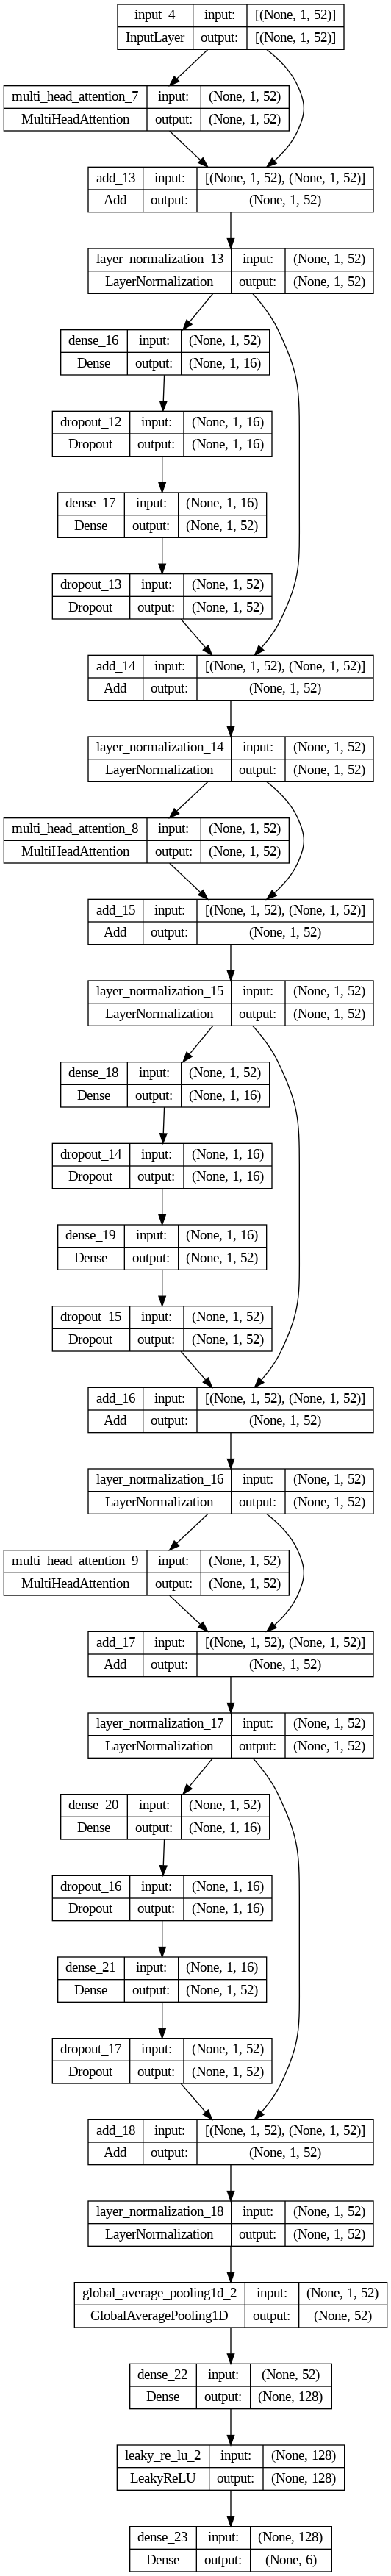

In [ ]:
# Print the model summary
tf_model.summary()
tf.keras.utils.plot_model(tf_model, "tf_model.png", show_shapes=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

optimiser = tf.keras.optimizers.Adam(learning_rate = 0.0001)

tf_model.compile(optimizer=optimiser,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

cb = [EarlyStopping(patience=300,
                    monitor='accuracy',
                    mode='max',
                    restore_best_weights=True)]

In [ ]:
import tensorflow as tf
import numpy as np

# Continue with model training
history = tf_model.fit(x_train,
                       y_train,
                       batch_size=128,
                       epochs=300,
                       validation_data=(x_val, y_val),
                       callbacks=cb)

Epoch 1/300
6/6 [==============================] - 8s 215ms/step - loss: 2.1305 - accuracy: 0.2283 - val_loss: 2.0095 - val_accuracy: 0.2357
Epoch 2/300
6/6 [==============================] - 0s 32ms/step - loss: 1.9022 - accuracy: 0.1900 - val_loss: 1.8139 - val_accuracy: 0.1720
Epoch 3/300
6/6 [==============================] - 0s 39ms/step - loss: 1.7621 - accuracy: 0.1900 - val_loss: 1.7044 - val_accuracy: 0.3822
Epoch 4/300
6/6 [==============================] - 0s 40ms/step - loss: 1.7069 - accuracy: 0.3078 - val_loss: 1.6619 - val_accuracy: 0.3312
Epoch 5/300
6/6 [==============================] - 0s 28ms/step - loss: 1.6932 - accuracy: 0.2946 - val_loss: 1.6523 - val_accuracy: 0.3694
Epoch 6/300
6/6 [==============================] - 0s 42ms/step - loss: 1.6858 - accuracy: 0.3387 - val_loss: 1.6428 - val_accuracy: 0.4204
Epoch 7/300
6/6 [==============================] - 0s 28ms/step - loss: 1.6685 - accuracy: 0.3991 - val_loss: 1.6330 - val_accuracy: 0.4395
Epoch 8/300
6/6 [==

22/22 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8675


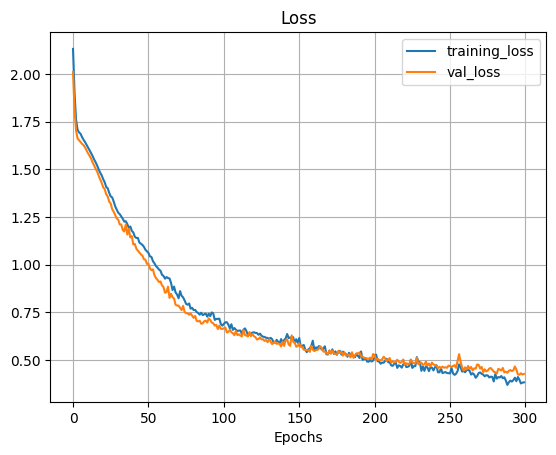

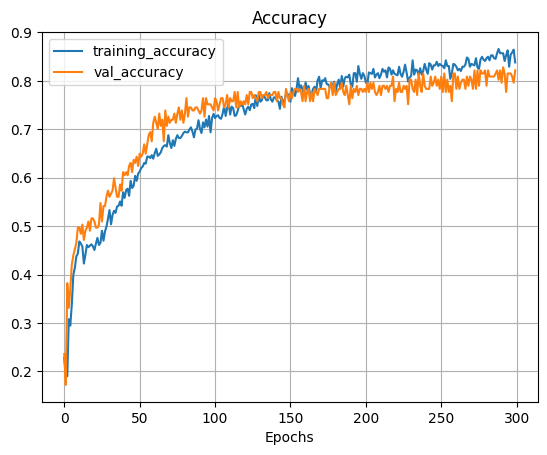

In [ ]:
# Evaluate the model
tf_model.evaluate(x_train, y_train)

# Plot loss curves
plot_loss_curves(history)

2/2 [==============================] - 0s 5ms/step


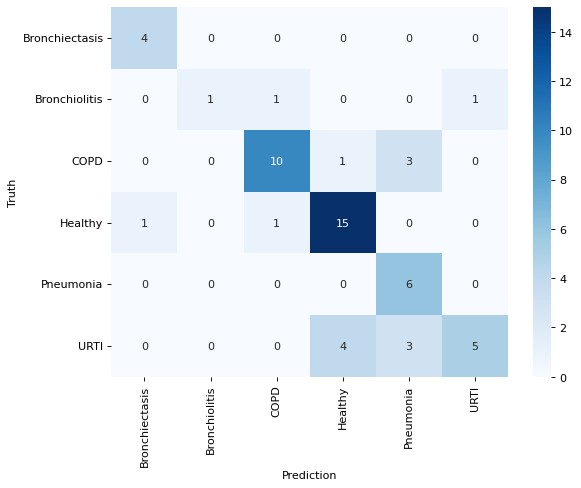

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import cohen_kappa_score,roc_auc_score,confusion_matrix,classification_report

classes = ['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia', 'URTI']
#  ["COPD" ,"Bronchiolitis ", "Pneumoina", "URTI", "Healthy", 'Bronchiectasis']

preds = tf_model.predict(x_test)
classpreds = [np.argmax(t) for t in preds ]

y_testclass = [np.argmax(t) for t in y_test]
cm = confusion_matrix(y_testclass, classpreds)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

plt.title('')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [ ]:
print(classification_report(y_testclass, classpreds, target_names=classes))

                precision    recall  f1-score   support

Bronchiectasis       0.80      1.00      0.89         4
 Bronchiolitis       1.00      0.33      0.50         3
          COPD       0.83      0.71      0.77        14
       Healthy       0.75      0.88      0.81        17
     Pneumonia       0.50      1.00      0.67         6
          URTI       0.83      0.42      0.56        12

      accuracy                           0.73        56
     macro avg       0.79      0.72      0.70        56
  weighted avg       0.78      0.73      0.72        56



#Test asli

In [ ]:
# def diagnosis_prediction(test_audio):
#     data_x, sampling_rate = librosa.load(test_audio)
#     data_x = stretch (data_x,1.2)

#     features = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=52).T,axis = 0)

#     features = features.reshape(1,52)

#     test_pred = tf_model.predict(np.expand_dims(features, axis = 1))
#     classpreds = classes[np.argmax(test_pred[0], axis=1)[0]]
#     confidence = test_pred.T[test_pred[0].mean(axis=0).argmax()].mean()

#     print (classpreds , confidence)

In [ ]:
# val=[]
# dir_= '/kaggle/input/respiratory-test/107_2b5_Ar_mc_AKGC417L.wav'
# features = 52

# soundDir = ''#'/kaggle/input/respiratory-test'
# data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
# mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
# val.append(mfccs)
# val = np.expand_dims(val,axis=1)

In [ ]:
# classes[np.argmax(tf_model.predict(val))]